<a href="https://colab.research.google.com/github/AnishaA-git/Dimentionality-Reduction/blob/master/Dimentionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabular Data Set

## PCA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
from sklearn.preprocessing import LabelEncoder, StandardScaler

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
n_components = 4

pca = PCA(n_components=n_components)
components = pca.fit_transform(df)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color=boston.target,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


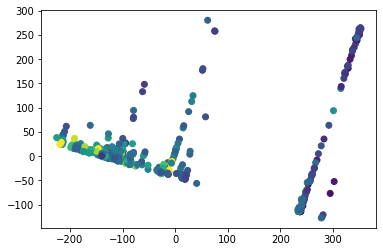

In [2]:
# import pandas as pd
# import plotly.express as px
# from sklearn.decomposition import PCA
# from sklearn.datasets import load_boston

# boston = load_boston()
# df = pd.DataFrame(boston.data, columns=boston.feature_names)
pca = PCA(n_components=2)
components = pca.fit_transform(df)
total_var = pca.explained_variance_ratio_.sum() * 100
# fig = px.scatter(components, x=0, y=1, color=boston.target, ,)
# fig.show()

fig, ax = plt.subplots()
ax.scatter(components[:, 0], components[:, 1], c=boston.target)


## PCA 1

In [3]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston

def pca_calc(n_components):
  # boston = load_boston()
  # df = pd.DataFrame(boston.data, columns=boston.feature_names)
  pca = PCA(n_components)
  components = pca.fit_transform(df)
  total_var = pca.explained_variance_ratio_.sum() * 100
  fig = px.scatter_3d(
      components, x=0, y=1, z=2, color=boston.target,
      title=f'Total Explained Variance: {total_var:.2f}%',
      labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
  )
  fig.show()

In [4]:
pca_calc(3)

## PCA 2

In [5]:
pca_calc(4)

## PCA 3

In [6]:
pca_calc(5)

## SVD

In [7]:
encoder = LabelEncoder()

In [8]:
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

In [9]:
scaler = StandardScaler()
X_features = scaler.fit_transform(df)

In [10]:
u, s, v = np.linalg.svd(X_features, full_matrices=True)

In [11]:
u.shape

(506, 506)

In [12]:
s.shape

(13,)

In [13]:
v.shape

(13, 13)

Text(0, 0.5, 'Percent of the variance explained')

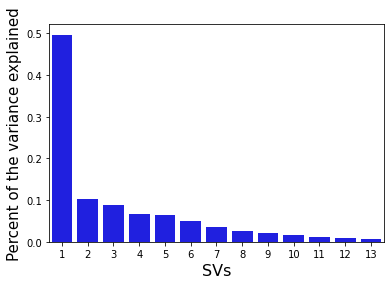

In [14]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 
sns.barplot(x=list(range(1,len(variance_explained)+1)),
            y=variance_explained, color="blue")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [15]:
col_labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=boston.target.tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'target'}, inplace=True)
svd_df.head()

,target,SV1,SV2
0,24.0,-0.054805,-0.007220
1,21.6,-0.038073,0.039611
2,34.7,-0.048038,0.000191
3,33.4,-0.063183,0.009314
4,36.2,-0.057469,0.013591


In [16]:
fig = px.scatter(x='SV1', y='SV2', color=boston.target,data_frame=svd_df)
print('SV 1: {0}%'.format(variance_explained[0]*100))
print('SV 2: {0}%'.format(variance_explained[1]*100))
fig.show()

SV 1: 49.7%
SV 2: 10.2%


## LLE

In [17]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.preprocessing import LabelEncoder, StandardScaler

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
n_components = 4

model = LocallyLinearEmbedding(n_neighbors=100, n_components=n_components, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(df)

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    out,
    color=boston.target,
    dimensions=range(n_components),
    labels=labels,
)
fig.update_traces(diagonal_visible=False)
fig.show()

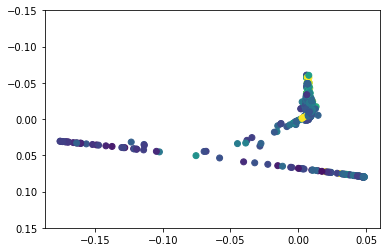

In [18]:
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(df)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], c=boston.target)
ax.set_ylim(0.15, -0.15);

In [19]:
def lle_calc(n):
  model = LocallyLinearEmbedding(n_neighbors=100, n_components=n)
  out = model.fit_transform(df)
  fig = px.scatter_3d(
      out, x=0, y=1, z=2, color=boston.target,
      labels={'0': 'LLE 1', '1': 'LLE 2', '2': 'LLE 3'}
  )
  fig.show()

## LLE 1

In [20]:
lle_calc(3)

## LLE 2

In [21]:
lle_calc(4)

## LLE 3

In [22]:
lle_calc(5)

## T-SNE

In [23]:
from sklearn.manifold import TSNE

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
n_components = 3
tsne = TSNE(n_components = n_components)

X_reduced_tsne = tsne.fit_transform(df)

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
# labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    X_reduced_tsne,
    color=boston.target,
    dimensions=range(n_components),
)
fig.update_traces(diagonal_visible=False)
fig.show()

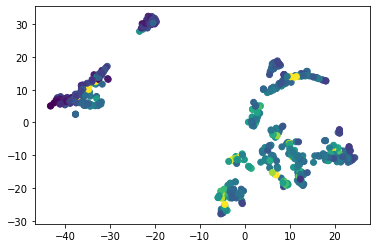

In [24]:
tsne = TSNE(n_components=2)
X_reduced_tsne = tsne.fit_transform(df)

fig, ax = plt.subplots()
ax.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=boston.target)
# ax.set_ylim(0.15, -0.15);

In [25]:
def t_sne_calc(n):
  tsne = TSNE(n_components=n)
  X_reduced_tsne = tsne.fit_transform(df)

  fig = px.scatter_3d(
      X_reduced_tsne, x=0, y=1, z=2, color=boston.target,
      labels={'0': 'T_SNE 1', '1': 'T_SNE 2', '2': 'T_SNE 3'}
  )
  fig.show()

## T-SNE 1

In [26]:
t_sne_calc(3)

## UMAP

In [ ]:
! pip install umap-learn
! pip install umap-learn[plot]

In [28]:
import umap
umap_op = umap.UMAP()
data_umap = umap_op.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



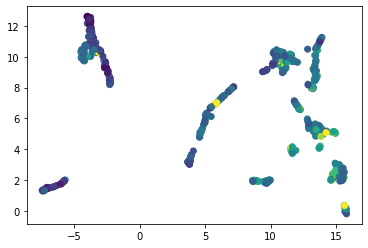

In [29]:
# scprep.plot.scatter2d(data_umap, c=metadata['CELLTYPE'],
#                       figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='UMAP')

fig, ax = plt.subplots()
ax.scatter(data_umap[:, 0], data_umap[:, 1], c=boston.target)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


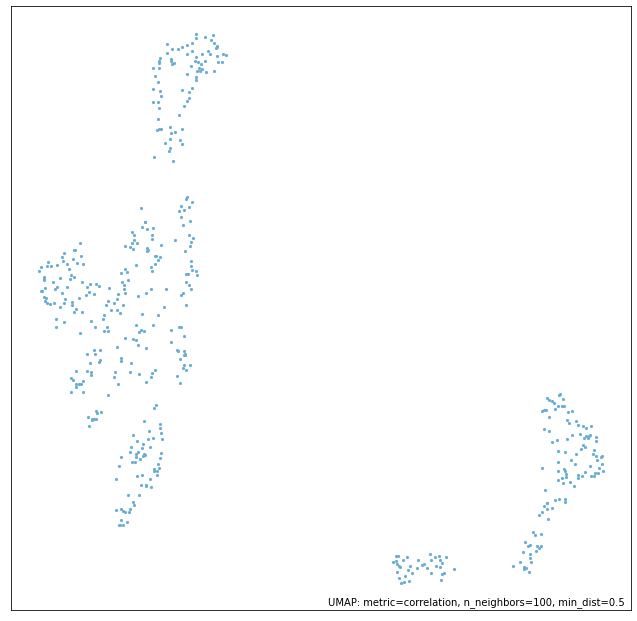

In [34]:
import umap
import umap.plot

# mapper = umap.UMAP().fit(boston.data)
embedding = umap.UMAP(n_neighbors=100,
                      min_dist=0.5,
                      metric='correlation').fit(boston.data)
umap.plot.points(embedding)


In [35]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
n_components = 2

umap_op = umap.UMAP()
data_umap = umap_op.fit_transform(df)

labels = {str(i): f"PC {i+1}" for i in range(n_components)}

fig = px.scatter_matrix(
    data_umap,
    color=boston.target,
    dimensions=range(n_components),
)
fig.update_traces(diagonal_visible=False)
fig.show()

# Image Dataset

## PCA

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
oliv = datasets.fetch_olivetti_faces()

In [37]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [38]:
oliv['data'].shape , oliv['images'].shape

((400, 4096), (400, 64, 64))

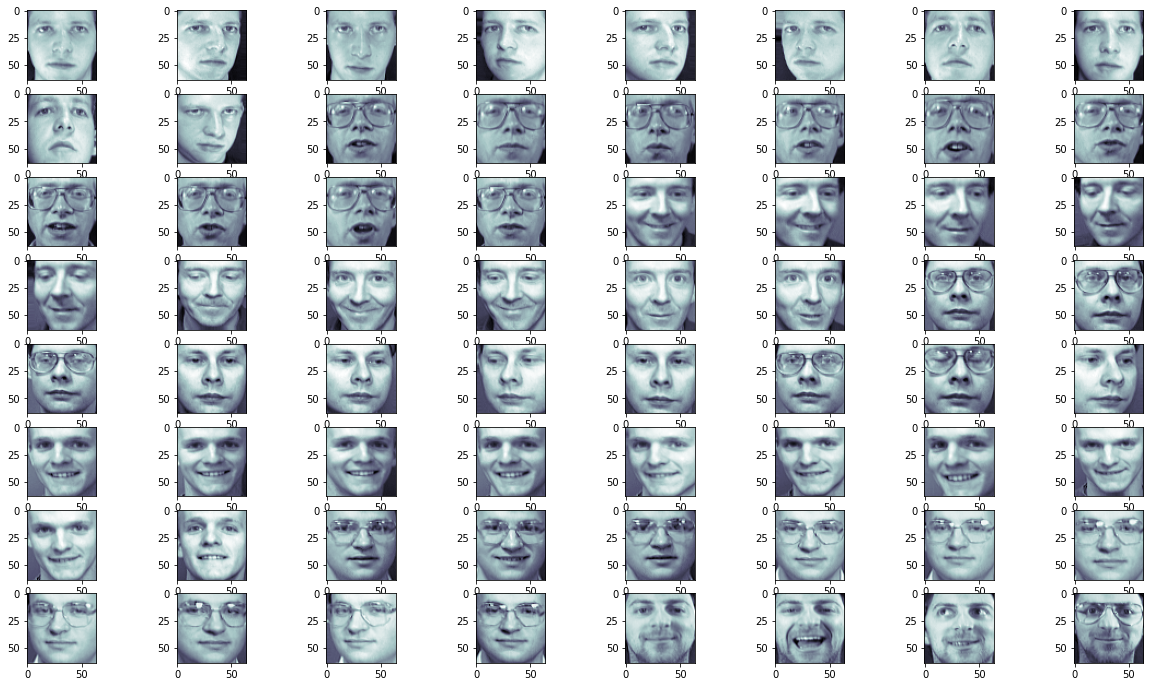

In [39]:
fig = plt.figure(figsize=(21,12))
for i in range(64):
    ax= fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i] , cmap=plt.cm.bone)
plt.show()

In [40]:
x = oliv.data
y = oliv.target

pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [41]:
pca = PCA(n_components = 100 , whiten =True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 100)

In [42]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

## PCA 1

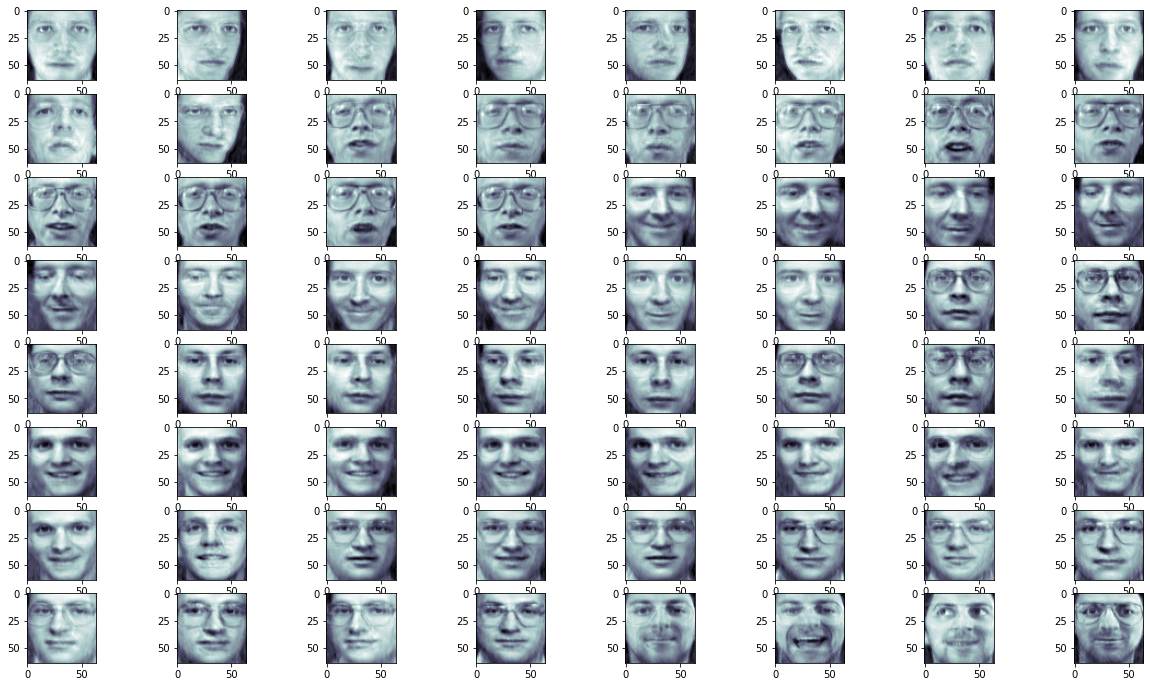

In [43]:
x_approx_img = x_approx.reshape(400,64,64)
fig = plt.figure(figsize = (21,12))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_img[i] , cmap = plt.cm.bone)
plt.show()

In [44]:
pca = PCA(n_components = 300 , whiten =True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 300)

In [45]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

## PCA 2

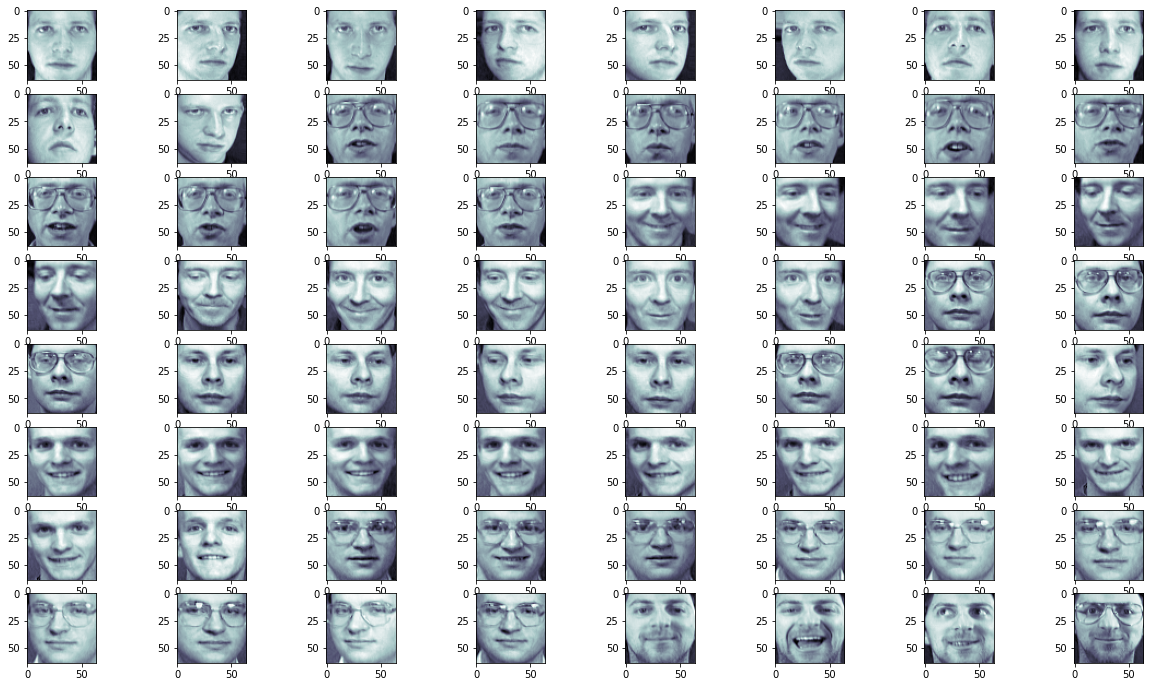

In [46]:
x_approx_img = x_approx.reshape(400,64,64)
fig = plt.figure(figsize = (21,12))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_img[i] , cmap = plt.cm.bone)
plt.show()

## SVD

In [47]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler

from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

from bokeh.plotting import ColumnDataSource
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.layouts import widgetbox, row
output_notebook()

In [48]:
def plot_gallery(title, images, n_col, n_row, titles=None,cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
        if titles:
            plt.title(titles[i])
    h_s = 0.2 if titles else 0
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, h_s)


normalize = lambda X: (X * 255/X.max()).astype(int)    

# Parameters
image_shape = (64, 64)
rng = np.random.seed(0)

In [49]:
# Load 1 face from olivetti dataset
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng).data #  we random extract one face
data = dataset[100].reshape(image_shape) # the 101th face

print("Image (dataset) shape: %s" % str(data.shape))

Image (dataset) shape: (64, 64)


In [50]:
def plot_gallery(title, images, n_col, n_row, titles=None,cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
        if titles:
            plt.title(titles[i])
    h_s = 0.2 if titles else 0
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, h_s)


normalize = lambda X: (X * 255/X.max()).astype(int)

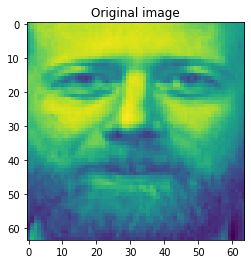

In [51]:
pic = data.reshape(image_shape)
plt.imshow(pic)
plt.title('Original image');

In [52]:
scaler = StandardScaler()      # 
X = normalize(data)#scaler.fit_transform(data) # 1. standardize data
U, S_vec, Vt = LA.svd(X)       # 2. apply svd

In [53]:
### Visualize
print('U:',U.shape, ', S vector: ', S_vec.shape, ', V*:', Vt.shape)
# Build the singular values matrix since numpy has returned a vector 
S = np.zeros( X.shape, dtype=complex)
S[:len(S), :len(S)] = np.diag(S_vec)
# Reconstruct the image normalizing values on 256 levels
X_r = normalize( np.dot(U, np.dot(S, Vt)) )
X_r

U: (64, 64) , S vector:  (64,) , V*: (64, 64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: ComplexWarning:

Casting complex values to real discards the imaginary part



array([[183, 204, 213, ..., 149, 151, 152],
       [180, 200, 210, ..., 149, 149, 148],
       [169, 187, 207, ..., 154, 148, 143],
       ...,
       [ 69, 152, 148, ...,  29,  44,  54],
       [ 87, 162, 151, ...,  30,  47,  55],
       [103, 170, 153, ...,  34,  47,  55]])

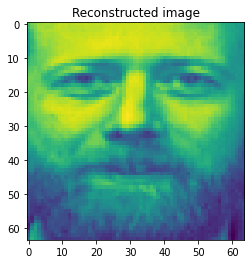

In [54]:
plt.imshow( X_r )
plt.title('Reconstructed image');

In [55]:
X.max()

255

MAE:  0.099365234375


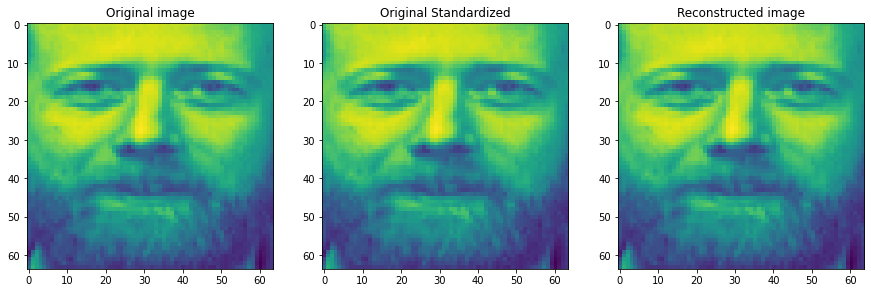

In [56]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow( pic )
plt.title('Original image')
plt.subplot(1,3,2)
plt.imshow( X )
plt.title('Original Standardized')
plt.subplot(1,3,3)
plt.imshow( X_r )
plt.title('Reconstructed image');
print( 'MAE: ',  np.sum(np.abs(X - X_r)) / np.prod(X.shape) )

In [57]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_neighbors=15, n_components=100,random_state=41)
X_lle = lle.fit_transform(x)
X_lle.shape

(400, 100)

In [58]:
# model = LocallyLinearEmbedding(n_neighbors=100, n_components=100)
# out = model.fit_transform(oliv['images'])
# out.shape

In [59]:
# # x_approx_img = out.reshape(40000,64,64)
# fig = plt.figure(figsize = (21,12))
# for i in range(64):
#     ax = fig.add_subplot(8,8,i+1)
#     ax.imshow(out , cmap = plt.cm.bone)
# plt.show()

## ISOMAP

In [60]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(oliv.data)
proj.shape

(400, 2)

In [61]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

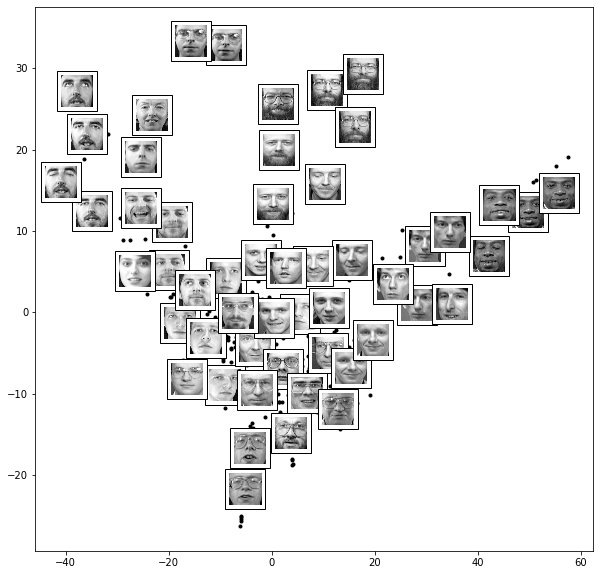

In [62]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(oliv.data,
                model=Isomap(n_components=2),
                images=oliv.images[:, ::2, ::2])

## UMAP

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


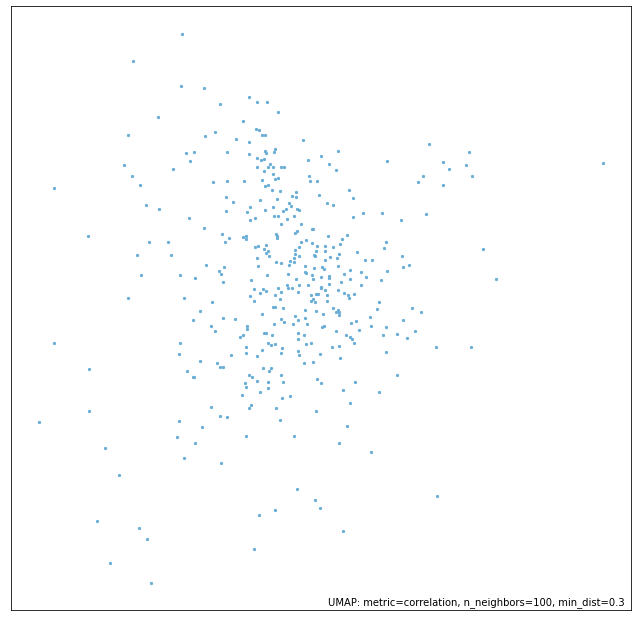

In [70]:
import umap
import umap.plot

# mapper = umap.UMAP().fit(boston.data)
embedding = umap.UMAP(densmap=True,n_neighbors=100,
                      min_dist=0.3,
                      metric='correlation').fit(oliv.data)
umap.plot.points(embedding)
